# Cookbook: Think with Images

In this cookbook, we will demonstrate how to think with images through Qwen3-VL inherent `image_zoom_in_tool` and `image_search` function calls using an agent.

# Install Requirements

We will use [Qwen-Agent](https://github.com/QwenLM/Qwen-Agent) in this book. For demonstration, we need at least the minimal functionality of Qwen-Agent.

In [ ]:
!pip3 install -U "qwen-agent" pillow dotenv
# `pip install -U qwen-agent` will install the minimal requirements.
# The optional requirements, specified in double brackets, are:
#   [gui] for Gradio-based GUI support;
#   [rag] for RAG support;
#   [code_interpreter] for Code Interpreter support;
#   [mcp] for MCP support.

# Example 1: Zoom-in Assistant

Using DashScope API or local OpenAI server to create an Qwen-Agent that is capable of:
- Thinking, zooming-in (through function call `image_zoom_in_tool`), and analizing.

Notes: the `bbox_2d` for `image_zoom_in_tool` is relative coords with ranging [0, 1000].

In [1]:
from qwen_agent.agents import Assistant
from qwen_agent.utils.output_beautify import typewriter_print, multimodal_typewriter_print
# `typewriter_print` prints streaming messages in a non-overlapping manner.

INFO 01-05 10:34:55 [__init__.py:216] Automatically detected platform cuda.


/mnt/shared-storage-user/wangzhengren/parse_env/lib/python3.10/site-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_identity" in SystemContent has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [9]:
llm_cfg = {
    # Use dashscope API
    # 'model': 'qwen3-vl-plus',
    # 'model_type': 'qwenvl_dashscope',
    # 'api_key': '' # **fill your api key here**

    # Use a model service compatible with the OpenAI API, such as vLLM or Ollama:
    'model_type': 'qwenvl_oai',
    'model': 'qwen3-vl-plus',
    'model_server': 'http://127.0.0.1:3888/v1',  # base_url, also known as api_base
    'api_key': 'sk-ohsIxhcDUF0xwqqmFl1L1niRtEOD9LnvxFGjtjakXennNTzI',
    'generate_cfg': {
        "top_p": 0.8,
        "top_k": 20,
        "temperature": 1.0,
        # "repetition_penalty": 1.0,
        # "presence_penalty": 1.5
    }
}

analysis_prompt = """Your role is that of a research assistant specializing in visual information. Answer questions about images by looking at them closely and then using research tools. Please follow this structured thinking process and show your work.

Start an iterative loop for each question:

- **First, look closely:** Begin with a detailed description of the image, paying attention to the user's question. List what you can tell just by looking, and what you'll need to look up.
- **Next, find information:** Use tools to research the things you need to find out. Think carefully before specifying the index of targeted image if there are multiple images.
- **Then, review the findings:** Carefully analyze what the tool tells you and decide on your next action.

Continue this loop until your research is complete.

To finish, bring everything together in a clear, synthesized answer that fully responds to the user's question."""

tools = ['image_zoom_in_tool', 'image_rotate_tool', 'mineru_parser']
agent = Assistant(
    llm=llm_cfg,
    function_list=tools,
    system_message=''
    # system_message=analysis_prompt,
    # [!Optional] We provide `analysis_prompt` to enable VL conduct deep analysis. Otherwise use system_message='' to simply enable the tools.
)

In [10]:
messages = []
messages += [
    {"role": "user", "content": [
        {"image": "./resource/test1.png"},
        {"text": "answer the query: 'Top Sectors by Percent'"}
    ]}
]

2026-01-05 10:38:14,915 - base.py - 780 - INFO - ALL tokens: 20, Available tokens: 58000


[TOOL_CALL] mineru_parser
{"img_idx": 0}

Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Adding requests:   0%|          | 0/44 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/44 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]


[TOOL_RESPONSE] mineru_parser
[
  {
    "type": "header",
    "bbox": [
      55,
      25,
      124,
      45
    ],
    "angle": 0,
    "content": "LSEG"
  },
  {
    "type": "header",
    "bbox": [
      55,
      48,
      143,
      72
    ],
    "angle": 0,
    "content": "Lipper"
  },
  {
    "type": "header",
    "bbox": [
      726,
      38,
      951,
      58
    ],
    "angle": 0,
    "content": "Morg Stan I:Em Mkt;IR"
  },
  {
    "type": "header",
    "bbox": [
      818,
      58,
      951,
      69
    ],
    "angle": 0,
    "content": "Data updated as of 12/31/2024"
  },
  {
    "type": "table_caption",
    "bbox": [
      60,
      76,
      162,
      89
    ],
    "angle": 0,
    "content": "Fund Overview"
  },
  {
    "type": "table",
    "bbox": [
      55,
      92,
      634,
      171
    ],
    "angle": 0,
    "content": "<table><tr><td>NASDAQ Ticker Symbol</td><td>MRGEX</td><td>Fund Manager</td><td>Psaila/Carlson/Hattangadi</td></tr><tr><td>Inception Date

2026-01-05 10:38:24,044 - base.py - 780 - INFO - ALL tokens: 6422, Available tokens: 58000



[TOOL_CALL] image_zoom_in_tool
{"img_idx": 0, "bbox": [650, 750, 910, 890], "label": "Top Sectors by Percent"}}
</tool
[TOOL_RESPONSE] image_zoom_in_tool



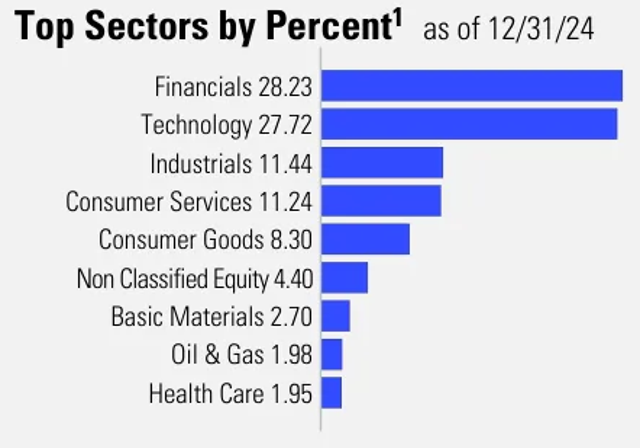

2026-01-05 10:38:30,499 - base.py - 780 - INFO - ALL tokens: 6475, Available tokens: 58000



[ANSWER]
Based on the document provided, the "Top Sectors by Percent" as of December 31, 2024, are as follows:

*   **Financials:** 28.23%
*   **Technology:** 27.72%
*   **Industrials:** 11.44%
*   **Consumer Services:** 11.24%
*   **Consumer Goods:** 8.30%
*   **Non Classified Equity:** 4.40%
*   **Basic Materials:** 2.70%
*   **Oil & Gas:** 1.98%
*   **Health Care:** 1.95%

In [11]:
response_plain_text = ''
for ret_messages in agent.run(messages):
    # `ret_messages` will contain all subsequent messages, consisting of interleaved assistant messages and tool responses
    response_plain_text = multimodal_typewriter_print(ret_messages, response_plain_text)

# Example 2: Multi-functional Assistant

We will create a assistant that is capable of `searching` and `zooming` to show the multi-functionality of VL agent.

To use serper API that enables searching functionality, we need first `export SERPER_API_KEY=xxx` and `export SERPAPI_IMAGE_SEARCH_KEY=xxx` before we run examples in Qwen-Agent.

In [1]:
from qwen_agent.agents import Assistant
from qwen_agent.utils.output_beautify import typewriter_print, multimodal_typewriter_print

llm_cfg = {
    # Use dashscope API
    # 'model': 'qwen3-vl-plus',
    # 'model_type': 'qwenvl_dashscope',
    # 'api_key': '' # **fill your api key here**

    # Use a model service compatible with the OpenAI API, such as vLLM or Ollama:
    'model_type': 'qwenvl_oai',
    'model': 'qwen3-vl-plus',
    'model_server': 'http://127.0.0.1:3888/v1',  # base_url, also known as api_base
    'api_key': 'sk-ohsIxhcDUF0xwqqmFl1L1niRtEOD9LnvxFGjtjakXennNTzI',
    'generate_cfg': {
        "top_p": 0.8,
        "top_k": 20,
        "temperature": 0.7,
        "repetition_penalty": 1.0,
        "presence_penalty": 1.5
    }
}

tools = [
    'image_zoom_in_tool',
    'image_search'
]
agent = Assistant(
    llm=llm_cfg,
    function_list=tools,
    system_message='Use tools to answer.',
)

In [2]:
messages = [{
    'role':
        'user',
    'content': [
        {
            'image': 'https://www.gongjiyun.com/assets/QucgbCSISoA7XCxlEI9cVQSOnbd.png'
        },
        {
            'text': 'Find the most prominet feature of these logos and search who creates them.'
        },
    ]
}]

In [ ]:
response_plain_text = ''
for ret_messages in agent.run(messages):
    # `ret_messages` will contain all subsequent messages, consisting of interleaved assistant messages and tool responses
    response_plain_text = multimodal_typewriter_print(ret_messages, response_plain_text)

# Use the GUI

We have explored the capabilities of the Qwen-Agent framework and Qwen models in processing files. We can also achieve this by using the GUI.

In [ ]:
from qwen_agent.gui import WebUI

agent = Assistant(
    name="Qwen File Processing Assistant",
    description="I can help with your file processing needs, ask me anything!",
    llm=llm_cfg,
    function_list=tools
)

WebUI(agent).run()